# 5.1-Mutual-information
# 5.2-Chi-square-test
# 5.3-Univariate-selection
# 5.4-Basic-methods-plus-statistical-pipeline

# 5.3-Univariate-selection
## Univariate feature selection (Anova)

Univariate feature selection works by selecting the best features based on univariate statistical tests (ANOVA). The methods estimate the degree of linear dependency between two random variables. In this case, any of the predictor variables and the target. 

ANOVA assumes a linear relationship between the feature and the target and that the variables follow a Gaussian distribution. If this is not true, the result of this test may not be useful.

These may not always be the case for the variables in your dataset, so if looking to implement these procedure, you will need to corroborate these assumptions.

I will demonstrate how to select features based on univariate tests using sklearn with a regression and classification dataset.

For the sake of the demonstration, I will assume that the variables show a linear relationship with the target and that they are normally distributed.

Anova tests the hypothesis that 2 or more samples have the same mean.

- Samples are independent
- Samples are normally distributed
- Homogeneity of variance

One way Anova: classification.

One way Anova: Regression:

- Correlation coefficient between variable and target.
- Convert the correlation into a p-value

Anova: Scikit-learn

- F_classif or f_regression: rank features > smallest the p-value
     - biggest importance
- SelectKBest: select best k features
- SelectPercentile: select features in top percentile

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# to determine the p-values with anova
from sklearn.feature_selection import f_classif, f_regression
# to select features
from sklearn.feature_selection import SelectKBest, SelectPercentile
import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Classification

In [4]:
data = pd.read_csv('../dataset_2.csv')
print(data.shape)
data.head(1)

(50000, 109)


,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109
0,4.53271,3.280834,17.982476,4.404259,2.34991,0.603264,2.784655,0.323146,12.009691,0.139346,...,2.079066,6.748819,2.941445,18.360496,17.726613,7.774031,1.473441,1.973832,0.976806,2.541417


In [5]:
X_train, X_test, y_train, y_test = train_test_split( data.drop(labels=['target'], axis=1), data['target'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((35000, 108), (15000, 108))

### Perform univariate anova

In [6]:
# calculate the univariate statistical measure between each of the variables and the target
# similarly to chi2, the output is one array with f-scores and one array with the p-values
univariate = f_classif(X_train, y_train)
univariate

(array([2.92073990e-01, 3.67738039e+01, 1.30411853e+01, 1.17574360e+01,
        1.41563181e+01, 3.06381672e+01, 2.02234060e+01, 2.96271569e+00,
        2.29045228e-01, 3.77443721e+00, 2.90430896e+00, 1.91250548e+01,
        5.05376700e+01, 1.19013857e+01, 2.07311280e+01, 7.33476852e+02,
        4.27044609e+01, 1.27667244e+01, 6.44432030e+00, 1.19060034e+01,
        2.73829670e+02, 3.90587287e+00, 1.12131044e+01, 3.51833011e+00,
        7.22171922e-01, 4.33080273e+01, 1.11696498e+00, 1.35149019e+01,
        7.04378672e-01, 7.82273154e+01, 1.07853079e+01, 5.07871810e+00,
        1.88154600e+00, 5.39927733e+02, 3.35223342e-02, 7.88844093e+00,
        2.39605100e+01, 2.36349439e+01, 5.53456743e+00, 2.23456221e-04,
        1.62264425e+00, 2.64838234e+00, 7.22501472e+00, 1.25555915e+00,
        1.32941890e+01, 3.83273241e+00, 3.27938257e+00, 1.98713697e+02,
        2.76343404e-02, 9.87511329e+00, 1.15466653e+01, 7.89411872e+00,
        2.45008055e+00, 2.00266136e+00, 2.16675637e+03, 1.264599

<AxesSubplot:>

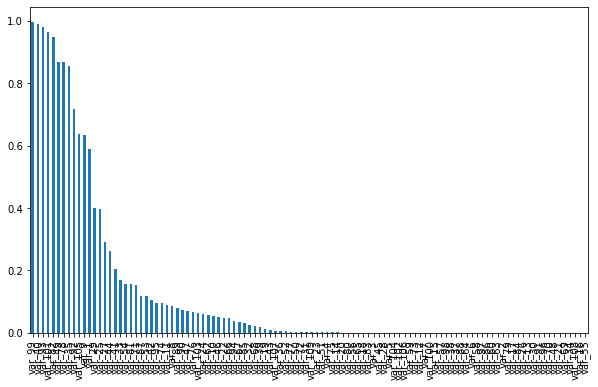

In [7]:
# 1) let's capture the pvalues in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on their anova pvalues
# 4) and make a var plot

univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(10, 6))

The smaller the p_value the more predictive the feature is.

Features on the left of the plot are very bad at predicting the target. The most predictive features are on the right of the plot.

**How can we select features based on the anova p-values?**

There are a few ways in which this can be done:

- Select top k features, where k is an arbitrary number of features

- Select features in the top n percentile, where n is again an arbitrary number

- Select all features below a certain threshold, arbitrarily decided.

Scikit-learn transformer **SelectKBest**, allows us to automatically select the top k features, based of any statistical value, including Anova. It will select those with the lowest pvalues.

Sklearn's **SelectPercentile** allows us to select the features in the top percentile of any statistical value, including the anova.

Alternatively, if we want to select features based on a pvalue threshold, we can do it manually.

### Select top 10 features based of univariate anova

In [8]:
# select the top 10 features
sel_ = SelectKBest(f_classif, k=10).fit(X_train, y_train)
# display selected feature names
X_train.columns[sel_.get_support()]

Index(['var_16', 'var_21', 'var_34', 'var_48', 'var_55', 'var_69', 'var_70',
       'var_91', 'var_96', 'var_108'],
      dtype='object')

In [9]:
# remove unwanted features from the dataset
X_train = sel_.transform(X_train)
X_train.shape

(35000, 10)

******************************
## Regression

In [11]:
data = pd.read_csv('../houseprice.csv')
print(data.shape)
data.head(1)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [12]:
# In practice, feature selection should be done after data pre-processing, so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target
# here for simplicity I will use only numerical variables, select numerical columns:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [13]:
X_train, X_test, y_train, y_test = train_test_split( data.drop(labels=['SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((1022, 37), (438, 37))

<AxesSubplot:>

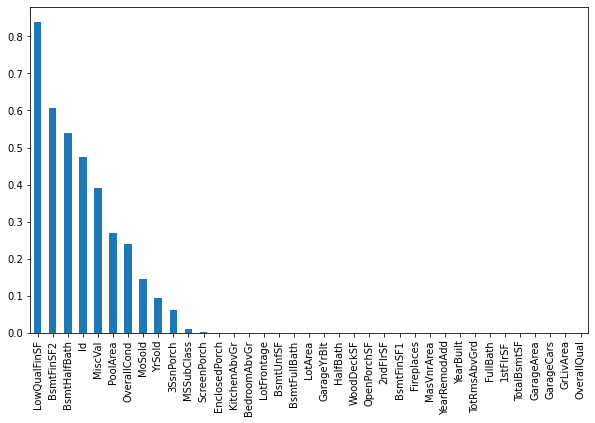

In [14]:
# Perform univariate anova
univariate = f_regression(X_train.fillna(0), y_train)
# plot values
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False).plot.bar(figsize=(10,6))

In [15]:
# select features in top 10th percentile
sel_ = SelectPercentile(f_regression, percentile=10).fit(X_train.fillna(0), y_train)

# display selected feature names
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [16]:
# select features / discard unwanted features
X_train = sel_.transform(X_train.fillna(0))
X_train.shape

(1022, 4)

# rarely use these methods to select features.
****************************
****************************
****************************

# 5.4-Basic-methods-plus-statistical-pipeline
## Filter Methods - Basics - Plus - Filter statistical tests

### Putting it all together


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import (VarianceThreshold, f_classif,  SelectKBest,)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
data = pd.read_csv('../dataset_1.csv')
print(data.shape)
data.head(1)

(50000, 301)


,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300,target
0,0,0,0.0,0.0,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0,0


In [20]:
X_train, X_test, y_train, y_test = train_test_split( data.drop(labels=['target'], axis=1), data['target'], test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((35000, 300), (15000, 300))

In [21]:
#keep a copy of the dataset with all the variables to compare the performance of machine learning models at the end of the notebook
X_train_original = X_train.copy()
X_test_original = X_test.copy()

In [22]:
# Remove constant features
constant_features = [   feat for feat in X_train.columns if X_train[feat].std() == 0 ]
X_train.drop(labels=constant_features, axis=1, inplace=True)
X_test.drop(labels=constant_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((35000, 266), (15000, 266))

In [23]:
# Remove quasi-constant features
sel = VarianceThreshold(threshold=0.01)
sel.fit(X_train) # finds the features with low variance
sum(sel.get_support()) # how many not quasi-constant?

215

In [24]:
# previously, we captured the feature names like this:

features_to_keep = X_train.columns[sel.get_support()]

len(features_to_keep)

215

In [25]:
# OR we can also capture them like this:
features_to_keep = sel.get_feature_names_out()
len(features_to_keep)

215

In [26]:
# remove the features
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)
X_train.shape, X_test.shape

((35000, 215), (15000, 215))

In [27]:
# sklearn transformations lead to numpy arrays, here I transform the arrays back to dataframes
X_train= pd.DataFrame(X_train)
X_train.columns = features_to_keep
X_test= pd.DataFrame(X_test)
X_test.columns = features_to_keep

In [28]:
# check for duplicated features in the training set
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)
    col_1 = X_train.columns[i]
    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
len(duplicated_feat)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210


10

In [29]:
# I keep a copy of the dataset except constant and duplicated variables to measure the performance of machine learning models at the end of the notebook
X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

In [30]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            # we are interested in absolute coeff value
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)))

correlated features:  103


In [31]:
# remove correlated features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((35000, 112), (15000, 112))

In [32]:
# keep a copy of the dataset at  this stage
X_train_corr = X_train.copy()
X_test_corr = X_test.copy()

### Select features based of anova

In [33]:
sel_ = SelectKBest(f_classif, k=20).fit(X_train, y_train)
# capture selected feature names
features_to_keep = X_train.columns[sel_.get_support()]
# or
features_to_keep = sel_.get_feature_names_out()

# select features
X_train_anova = sel_.transform(X_train)
X_test_anova = sel_.transform(X_test)

# numpy array to dataframe
X_train_anova = pd.DataFrame(X_train_anova)
X_train_anova.columns = features_to_keep

X_test_anova = pd.DataFrame(X_test_anova)
X_test_anova.columns = features_to_keep

X_train_anova.shape, X_test_anova.shape

((35000, 20), (15000, 20))

### Compare the performance in machine learning algorithms

In [34]:
# create a function to build random forests and
# compare its performance in train and test sets
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [35]:
# original
run_randomForests(X_train_original,  X_test_original,  y_train, y_test)

Train set
Random Forests roc-auc: 0.807612232524249
Test set
Random Forests roc-auc: 0.7868832427636059


In [36]:
# filter methods - basic
run_randomForests(X_train_basic_filter,X_test_basic_filter,y_train, y_test)

Train set
Random Forests roc-auc: 0.8039915339403194
Test set
Random Forests roc-auc: 0.7849726030107016


In [37]:
# filter methods - correlation
run_randomForests(X_train_corr, X_test_corr, y_train, y_test)

Train set
Random Forests roc-auc: 0.8066004772684517
Test set
Random Forests roc-auc: 0.7859521124929707


In [38]:
# filter methods - univariate roc-auc
run_randomForests(X_train_anova, X_test_anova, y_train, y_test)

Train set
Random Forests roc-auc: 0.8181634778452822
Test set
Random Forests roc-auc: 0.7994720109870546


As we see, the 20 features we selected using the univariate anova are doing a good job, as the final model does not show a decrease in performance compared to that one using all features

In [39]:
# create a function to build logistic regression
# and compare its performance in train and test sets
def run_logistic(X_train, X_test, y_train, y_test):
    scaler = StandardScaler().fit(X_train)
    # function to train and test the performance of logistic regression
    logit = LogisticRegression( penalty='l1', random_state=44, max_iter=1000, solver='liblinear')
    # fit
    logit.fit(scaler.transform(X_train), y_train)
    print('Train set')
    pred = logit.predict_proba(scaler.transform(X_train))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_train, pred[:, 1])))

    print('Test set')
    pred = logit.predict_proba(scaler.transform(X_test))
    print('Logistic Regression roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

In [40]:
# original
run_logistic(X_train_original,  X_test_original, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.8022197599721129
Test set
Logistic Regression roc-auc: 0.795929816232469


In [41]:
# filter methods - basic
run_logistic(X_train_basic_filter, X_test_basic_filter, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.801573138338341
Test set
Logistic Regression roc-auc: 0.7956278983019236


In [42]:
# filter methods - correlation
run_logistic(X_train_corr, X_test_corr, y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7938745217286656
Test set
Logistic Regression roc-auc: 0.7882478643347434


In [43]:
# filter methods - univariate anova

run_logistic(X_train_anova,  X_test_anova,  y_train, y_test)

Train set
Logistic Regression roc-auc: 0.7827245834924114
Test set
Logistic Regression roc-auc: 0.7720492495853009


As we see, the 20 features we selected using the univariate anova are doing a good job, as the final model does not show a big decrease in performance compared to that one using all features.

Why don't you try to apply the univariate anova without removing features by correlation, to see if the selected features are good enough?